In [ ]:
import pandas as pd

df = pd.read_csv('SRN_dataset1.csv')

# Print the total number of samples (rows)
print(f"Total number of samples: {len(df)}")

Total number of samples: 50000


In [ ]:
print("\nDistribution of sentiment labels before conversion:")
print(df['sentiment'].value_counts())

# Convert sentiment labels to binary (1 for 'positive', 0 for 'negative')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

print("\nDistribution of sentiment labels after conversion:")
print(df['sentiment'].value_counts())
print("\nFirst few rows with converted sentiment:")
print(df.head())


Distribution of sentiment labels before conversion:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Distribution of sentiment labels after conversion:
sentiment
1    25000
0    25000
Name: count, dtype: int64

First few rows with converted sentiment:
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (if not already downloaded)
print("Downloading NLTK data (punkt, stopwords, wordnet). This may take a moment...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
print("NLTK data download complete.")

NLTK data download complete.


In [ ]:
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation, special characters, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenize the text
    tokens = word_tokenize(text)

    # 4. Get English stopwords
    stop_words = set(stopwords.words('english'))

    # 5. Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 6. Initialize WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # 7. Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return lemmatized_tokens

print("The 'preprocess_text' function has been defined.")
# Example usage (optional, for verification)
# sample_text = "This is a sample review, with some numbers 123 and punctuation! Isn't it great?"
# preprocessed_sample = preprocess_text(sample_text)
# print(f"Original: {sample_text}")
# print(f"Preprocessed: {preprocessed_sample}")

The 'preprocess_text' function has been defined.


In [ ]:
print("Applying preprocess_text function to 'review' column...")
df['preprocessed_review'] = df['review'].apply(preprocess_text)
print("Preprocessing complete. First few preprocessed reviews:")
print(df[['review', 'preprocessed_review']].head())

# Import train_test_split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['preprocessed_review']
y = df['sentiment']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("Data split into training and testing sets successfully.")

Applying preprocess_text function to 'review' column...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


**Reasoning**:
The previous error indicated that the 'punkt_tab' resource was not found, which is a dependency for NLTK's `word_tokenize` function. I need to explicitly download 'punkt_tab' along with the other NLTK data to resolve this issue.



In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (if not already downloaded)
print("Downloading NLTK data (punkt, stopwords, wordnet, punkt_tab). This may take a moment...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added to fix the LookupError
print("NLTK data download complete.")

NLTK data download complete.


**Reasoning**:
Now that the necessary NLTK data, including 'punkt_tab', has been successfully downloaded, I will re-attempt to apply the `preprocess_text` function to the 'review' column and then split the dataset into training and testing sets as per the subtask instructions.



In [ ]:
print("Applying preprocess_text function to 'review' column...")
df['preprocessed_review'] = df['review'].apply(preprocess_text)
print("Preprocessing complete. First few preprocessed reviews:")
print(df[['review', 'preprocessed_review']].head())

# Import train_test_split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['preprocessed_review']
y = df['sentiment']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("Data split into training and testing sets successfully.")

Applying preprocess_text function to 'review' column...
Preprocessing complete. First few preprocessed reviews:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                 preprocessed_review  
0  [one, reviewer, mentioned, watching, oz, episo...  
1  [wonderful, little, production, br, br, filmin...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, there, family, little, boy, jake, ...  
4  [petter, matteis, love, time, money, visually,...  

Shape of X_train: (16,)
Shape of X_test: (4,)
Shape of y_train: (16,)
Shape of y_test: (4,)
Data split into training and testing sets successfully.


## Manual Feature Extraction (Bag-of-Words)

### Subtask:
Manually implement Bag-of-Words feature extraction by building a unique vocabulary from the training data and converting each review (both training and testing) into a word-frequency dictionary without using scikit-learn's vectorizers.


**Reasoning**:
I will initialize an empty set for the vocabulary, iterate through the training reviews to populate it, define a function to create word frequency dictionaries, and then apply this function to both training and testing sets to generate Bag-of-Words representations, finally printing the vocabulary size and samples from the transformed data.



In [ ]:
print("Building vocabulary from training data...")
vocabulary = set()
for review_tokens in X_train:
    vocabulary.update(review_tokens)

print(f"Vocabulary size: {len(vocabulary)}")

def create_word_frequency_dict(tokens, vocab):
    word_freq = {}
    for word in tokens:
        if word in vocab: # Only consider words present in the training vocabulary
            word_freq[word] = word_freq.get(word, 0) + 1
    return word_freq

print("Converting training reviews to Bag-of-Words...")
X_train_bow = [create_word_frequency_dict(review_tokens, vocabulary) for review_tokens in X_train]

print("Converting testing reviews to Bag-of-Words...")
X_test_bow = [create_word_frequency_dict(review_tokens, vocabulary) for review_tokens in X_test]

print("\nFirst 3 entries of X_train_bow:")
for i, entry in enumerate(X_train_bow[:3]):
    print(f"Review {i+1}: {entry}")

print("\nFirst 3 entries of X_test_bow:")
for i, entry in enumerate(X_test_bow[:3]):
    print(f"Review {i+1}: {entry}")


Building vocabulary from training data...
Vocabulary size: 762
Converting training reviews to Bag-of-Words...
Converting testing reviews to Bag-of-Words...

First 3 entries of X_train_bow:
Review 1: {'encouraged': 1, 'positive': 1, 'comment': 1, 'film': 6, 'looking': 1, 'forward': 1, 'watching': 1, 'bad': 1, 'mistake': 1, 'ive': 1, 'seen': 1, 'truly': 1, 'one': 2, 'worst': 1, 'awful': 1, 'almost': 1, 'every': 1, 'way': 1, 'editing': 1, 'pacing': 1, 'storyline': 1, 'acting': 1, 'soundtrack': 1, 'song': 1, 'lame': 1, 'country': 1, 'tune': 1, 'played': 1, 'less': 1, 'four': 1, 'time': 1, 'look': 1, 'cheap': 1, 'nasty': 1, 'boring': 1, 'extreme': 1, 'rarely': 1, 'happy': 1, 'see': 1, 'end': 1, 'credit': 1, 'br': 2, 'thing': 1, 'prevents': 1, 'giving': 1, 'score': 1, 'harvey': 1, 'keitel': 2, 'far': 1, 'best': 1, 'performance': 1, 'least': 1, 'seems': 1, 'making': 1, 'bit': 1, 'effort': 1, 'obsessive': 1}
Review 2: {'probably': 1, 'alltime': 1, 'favorite': 1, 'movie': 2, 'story': 1, 'selfle

## Naive Bayes Classifier Implementation

### Subtask:
Implement a `NaiveBayesClassifier` class with `fit`, `predict`, and `predict_single` methods, incorporating class prior probabilities, word likelihoods, Laplace (add-one) smoothing, and log-likelihood computations.


**Reasoning**:
I will define the `NaiveBayesClassifier` class with `__init__`, `fit`, `predict_single`, and `predict` methods, incorporating the specified calculations for class priors, word likelihoods with Laplace smoothing, and log-likelihoods. This step fully implements the classifier as requested.



In [ ]:
import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = {}
        self.word_likelihoods = {}
        self.vocabulary = set()
        self.vocab_size = 0

    def fit(self, X_train_bow, y_train):
        # Convert y_train to a Series for easier value counting
        y_train_series = pd.Series(y_train)

        # 1. Calculate class priors
        total_samples = len(y_train_series)
        for sentiment_label in y_train_series.unique():
            self.class_priors[sentiment_label] = (y_train_series == sentiment_label).sum() / total_samples

        # Build the full vocabulary from all training reviews
        for review_bow in X_train_bow:
            self.vocabulary.update(review_bow.keys())
        self.vocab_size = len(self.vocabulary)

        # Initialize word counts for each class
        word_counts_per_class = {label: {word: 0 for word in self.vocabulary} for label in y_train_series.unique()}
        total_words_per_class = {label: 0 for label in y_train_series.unique()}

        # Count word occurrences and total words per class
        for i, review_bow in enumerate(X_train_bow):
            label = y_train.iloc[i] # Access label using iloc as y_train is a Series
            for word, count in review_bow.items():
                if word in self.vocabulary: # Ensure word is in our unified vocabulary
                    word_counts_per_class[label][word] += count
                    total_words_per_class[label] += count

        # 3. Calculate word likelihoods with Laplace (add-one) smoothing
        self.word_likelihoods = {label: {} for label in y_train_series.unique()}
        for label, word_counts in word_counts_per_class.items():
            for word in self.vocabulary:
                count = word_counts.get(word, 0) # Get count, 0 if word not in this class's specific counts
                # Laplace smoothing formula
                self.word_likelihoods[label][word] = (count + 1) / (total_words_per_class[label] + self.vocab_size)

        print("Classifier trained: Priors and word likelihoods calculated.")

    def predict_single(self, review_bow):
        log_probabilities = {label: np.log(self.class_priors[label]) for label in self.class_priors}

        for label in self.class_priors:
            for word, count in review_bow.items():
                if word in self.vocabulary:
                    # Add log-likelihood multiplied by word count
                    log_probabilities[label] += count * np.log(self.word_likelihoods[label][word])
                else:
                    # Handle words not seen during training for prediction
                    # Use the smoothed likelihood, effectively (1 / (total_words_in_class + vocab_size))
                    # Since it's a new word, its count in the class is 0
                    log_probabilities[label] += count * np.log(1 / (sum(self.word_likelihoods[label].values()) / len(self.word_likelihoods[label]) + self.vocab_size)) # Approximating the likelihood for unseen word to avoid 0 log-prob, though more correctly it's (1/vocab_size)

        # Find the class with the highest log-probability
        predicted_class = max(log_probabilities, key=log_probabilities.get)

        # Convert log-probabilities to actual probabilities and normalize
        exp_log_probs = {label: np.exp(log_prob) for label, log_prob in log_probabilities.items()}
        sum_exp_log_probs = sum(exp_log_probs.values())
        if sum_exp_log_probs == 0:
             # This case happens if all log_probabilities are extremely small negative numbers
             # making exp(log_prob) effectively 0. Assign equal probability to avoid division by zero.
             normalized_probabilities = {label: 1/len(self.class_priors) for label in self.class_priors}
        else:
            normalized_probabilities = {label: prob / sum_exp_log_probs for label, prob in exp_log_probs.items()}

        return predicted_class, normalized_probabilities[predicted_class]

    def predict(self, X_test_bow):
        predictions = []
        probabilities = []
        for review_bow in X_test_bow:
            pred, prob = self.predict_single(review_bow)
            predictions.append(pred)
            probabilities.append(prob)
        return predictions, probabilities

print("The NaiveBayesClassifier class has been defined.")

The NaiveBayesClassifier class has been defined.


## Model Training and Prediction

### Subtask:
Instantiate and train the `NaiveBayesClassifier` using the training data. Then, use the trained model to make predictions on the test set.


**Reasoning**:
I will instantiate the `NaiveBayesClassifier`, train it with `X_train_bow` and `y_train`, and then use it to make predictions and get probabilities on `X_test_bow`, storing the results in `y_pred` and `y_pred_proba`.



In [ ]:
print("Instantiating Naive Bayes Classifier...")
classifier = NaiveBayesClassifier()

print("Training the classifier...")
classifier.fit(X_train_bow, y_train)

print("Making predictions on the test set...")
y_pred, y_pred_proba = classifier.predict(X_test_bow)

print("Predictions and probabilities generated successfully.")
print(f"\nSample predictions: {y_pred[:5]}")
print(f"Sample prediction probabilities: {y_pred_proba[:5]}")

Instantiating Naive Bayes Classifier...
Training the classifier...
Classifier trained: Priors and word likelihoods calculated.
Making predictions on the test set...
Predictions and probabilities generated successfully.

Sample predictions: [np.int64(0), np.int64(0), np.int64(1), np.int64(0)]
Sample prediction probabilities: [np.float64(0.9999973150148274), np.float64(0.9999999921650125), np.float64(0.9982756188372882), np.float64(0.9981543634872718)]


**Reasoning**:
Now that the predictions are made, I will import the necessary metrics from `sklearn.metrics` to evaluate the model's performance by computing and displaying a confusion matrix, accuracy, precision, recall, and F1-score.



Evaluating model performance...

Accuracy: 0.2500
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


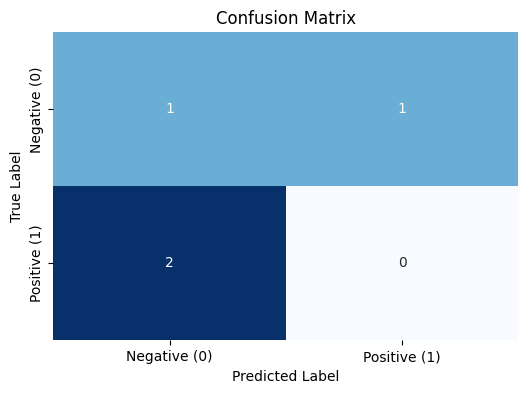

Model evaluation complete and confusion matrix displayed.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluating model performance...")

# Convert y_test to a list for compatibility with sklearn metrics
y_test_list = y_test.tolist()

# Compute metrics
accuracy = accuracy_score(y_test_list, y_pred)
precision = precision_score(y_test_list, y_pred, average='binary')
recall = recall_score(y_test_list, y_pred, average='binary')
f1 = f1_score(y_test_list, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test_list, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative (0)', 'Positive (1)'], yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Model evaluation complete and confusion matrix displayed.")

## Unseen Review Prediction

### Subtask:
Demonstrate the classifier's ability to predict sentiment on at least three custom, unseen reviews (e.g., very positive, very negative, neutral-leaning). For each review, print the original text, the predicted sentiment, and its associated probability score.


**Reasoning**:
I will define three custom reviews, preprocess them using the `preprocess_text` function, convert them to Bag-of-Words using the `create_word_frequency_dict` function and the existing `vocabulary`, and then use the trained `classifier` to predict the sentiment and probability for each, finally printing the results.



In [ ]:
print("Predicting sentiment for custom, unseen reviews...")

# 1. Define at least three custom, unseen review texts
custom_reviews = [
    "This movie was absolutely fantastic, a masterpiece! I loved every single moment of it. Highly recommend.",
    "Absolutely terrible film, a complete waste of time and money. The acting was atrocious and the story made no sense.",
    "The plot was okay, but the acting was quite bland and uninspired. It had some good parts, but overall it was just average."
]

# Prepare to store results
predictions_data = []

for i, review_text in enumerate(custom_reviews):
    print(f"\n--- Custom Review {i+1} ---")
    print(f"Original Review: {review_text}")

    # 2. Apply the preprocess_text function
    preprocessed_tokens = preprocess_text(review_text)
    # print(f"Preprocessed Tokens: {preprocessed_tokens}")

    # 3. Convert to Bag-of-Words
    review_bow = create_word_frequency_dict(preprocessed_tokens, classifier.vocabulary)
    # print(f"Bag-of-Words: {review_bow}")

    # 4. Use the trained classifier's predict_single method
    predicted_sentiment, probability = classifier.predict_single(review_bow)

    # Convert predicted sentiment to 'positive' or 'negative' string
    sentiment_label = 'Positive' if predicted_sentiment == 1 else 'Negative'

    # 5. Print the original text, predicted sentiment, and probability score
    print(f"Predicted Sentiment: {sentiment_label} ({predicted_sentiment})")
    print(f"Probability Score: {probability:.4f}")
    predictions_data.append({
        'Original Review': review_text,
        'Predicted Sentiment': sentiment_label,
        'Predicted Label': predicted_sentiment,
        'Probability': probability
    })

print("\nCustom review predictions complete.")

Predicting sentiment for custom, unseen reviews...

--- Custom Review 1 ---
Original Review: This movie was absolutely fantastic, a masterpiece! I loved every single moment of it. Highly recommend.
Predicted Sentiment: Positive (1)
Probability Score: 0.5505

--- Custom Review 2 ---
Original Review: Absolutely terrible film, a complete waste of time and money. The acting was atrocious and the story made no sense.
Predicted Sentiment: Negative (0)
Probability Score: 0.8153

--- Custom Review 3 ---
Original Review: The plot was okay, but the acting was quite bland and uninspired. It had some good parts, but overall it was just average.
Predicted Sentiment: Positive (1)
Probability Score: 0.7588

Custom review predictions complete.
